# Importing Everything Needed

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
pd.pandas.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv("india_housing_prices.csv")
df1 = pd.read_csv("Housing.csv")

In [3]:
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.head(4)

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,Furnished,22,1,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,Unfurnished,21,20,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,Semi-furnished,19,27,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,Furnished,21,26,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move


In [5]:
df.drop(columns=["ID"], inplace=True)

In [6]:
df.shape

(250000, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   State                           250000 non-null  object 
 1   City                            250000 non-null  object 
 2   Locality                        250000 non-null  object 
 3   Property_Type                   250000 non-null  object 
 4   BHK                             250000 non-null  int64  
 5   Size_in_SqFt                    250000 non-null  int64  
 6   Price_in_Lakhs                  250000 non-null  float64
 7   Price_per_SqFt                  250000 non-null  float64
 8   Year_Built                      250000 non-null  int64  
 9   Furnished_Status                250000 non-null  object 
 10  Floor_No                        250000 non-null  int64  
 11  Total_Floors                    250000 non-null  int64  
 12  Age_of_Property 

# Year_Built is ready to use no feature Engineering

In [8]:
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(dropna=False).head())


Column: State
State
Odisha         12681
Tamil Nadu     12629
West Bengal    12622
Gujarat        12578
Delhi          12552
Name: count, dtype: int64

Column: City
City
Coimbatore    6461
Ahmedabad     6411
Silchar       6404
Durgapur      6387
Cuttack       6358
Name: count, dtype: int64

Column: Locality
Locality
Locality_296    567
Locality_316    562
Locality_297    561
Locality_313    560
Locality_321    558
Name: count, dtype: int64

Column: Property_Type
Property_Type
Villa                83744
Independent House    83300
Apartment            82956
Name: count, dtype: int64

Column: BHK
BHK
1    50196
5    50134
3    50067
2    49815
4    49788
Name: count, dtype: int64

Column: Size_in_SqFt
Size_in_SqFt
2098    86
4775    84
4473    80
1642    80
810     80
Name: count, dtype: int64

Column: Price_in_Lakhs
Price_in_Lakhs
137.92    16
423.58    16
292.91    16
40.22     16
42.76     16
Name: count, dtype: int64

Column: Price_per_SqFt
Price_per_SqFt
0.05    14196
0.04    14181


## Used LabelEncode on State,Facing and Owner_tye Columns


In [9]:
LE = LabelEncoder()

In [10]:
df["State"] = LE.fit_transform(df["State"])

In [11]:
df["Facing"] = LE.fit_transform(df["Facing"])

In [12]:
df["Owner_Type"] = LE.fit_transform(df["Owner_Type"])

# Target Encoding

In [13]:
city_avg = df.groupby('City')['Price_per_SqFt'].mean()
df['City_encoded'] = df['City'].map(city_avg)
df.drop(columns=['City'], inplace = True)

# One Hot Enccoding "Availability Status"

In [14]:
df['Is_Ready_to_Move'] = df['Availability_Status'].apply(lambda x: 1 if x == 'Ready_to_Move' else 0)


In [15]:
df.drop(columns=["Availability_Status"], inplace=True)

In [16]:
df['Locality'] = df['Locality'].str.split("_").apply(lambda x: x[1]).astype(int)

In [17]:
cols_to_encode = ['Property_Type', 'Furnished_Status', 'Public_Transport_Accessibility','Security','Parking_Space']

In [18]:
encoder = OrdinalEncoder(categories=[
    ['Apartment', 'Independent House', 'Villa'],        # Property_Type
    ['Unfurnished', 'Semi-furnished', 'Furnished'],     # Furnished_Status
    ['Low', 'Medium', 'High'],                          # Public_Transport_Accessibility
    ['No', 'Yes'],                                      # Security
    ['No', 'Yes']                                       # Parking_Space
])


In [19]:
df[cols_to_encode] = encoder.fit_transform(df[cols_to_encode])


In [20]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

# Step 1: Clean and split the comma-separated strings into lists
df['Amenities'] = df['Amenities'].apply(lambda x: [i.strip() for i in x.split(',') if i.strip() != ''])

# Step 2: Initialize and fit the MultiLabelBinarizer
mlb = MultiLabelBinarizer()
amenities_encoded = mlb.fit_transform(df['Amenities'])

# Step 3: Create a new DataFrame with binary columns for each amenity
amenities_df = pd.DataFrame(amenities_encoded, columns=mlb.classes_, index=df.index)

# Step 4: Concatenate the new binary columns back to the original DataFrame
df = pd.concat([df, amenities_df], axis=1)

df.drop('Amenities', axis=1, inplace=True)

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(df.drop(columns=['Price_in_Lakhs']),df['Price_in_Lakhs'],test_size=0.2,random_state=42)

C:\Users\anand\AppData\Local\Temp\ipykernel_8384\2163986655.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_train)


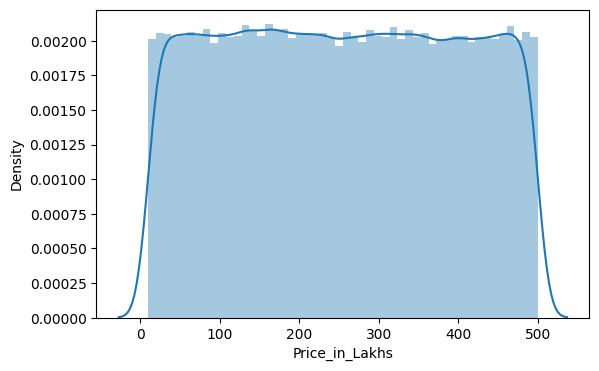

In [22]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(Y_train)
plt.show()

In [23]:
Y_train.skew()

np.float64(0.007770727715464974)

In [24]:
SS=StandardScaler()
X_train=SS.fit_transform(X_train)
X_test=SS.transform(X_test)

In [25]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [26]:
model=Sequential()
model.add(Dense(10,activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='linear'))

C:\Users\anand\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss='mean_absolute_error',optimizer='Adam')

In [29]:
history = model.fit(X_train,Y_train,epochs=10,validation_split=0.2)

Epoch 1/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 164.8007 - val_loss: 82.2148
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 64.6390 - val_loss: 28.5642
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 25.8362 - val_loss: 20.2919
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 19.1531 - val_loss: 17.1740
Epoch 5/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 16.6747 - val_loss: 15.5060
Epoch 6/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 15.3590 - val_loss: 14.6819
Epoch 7/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 14.6260 - val_loss: 14.1978
Epoch 8/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 14.0284 - val_loss: 13.7621
Epoch 9/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 13.7268 - val_loss: 13.3949
Epoch 10/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 13.3670 - val_loss: 13.0843


In [30]:
y_pred =model.predict(X_test)
r2_score(Y_test, y_pred)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step


0.9854118357849141

In [31]:
mean_squared_error(Y_test, y_pred)

290.82242849503945

In [32]:
y_pred = y_pred.argmax(axis=-1)

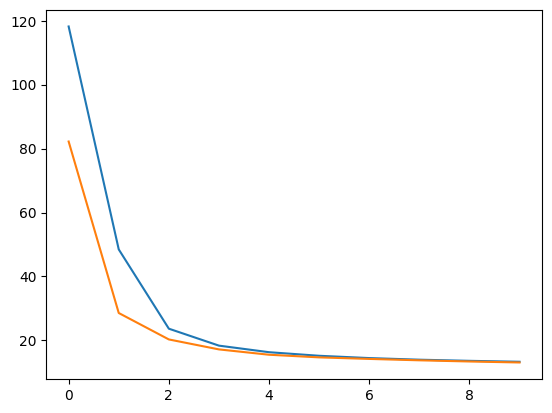

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [34]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": AdaBoostRegressor(n_estimators=200, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
}

# Store evaluation metrics
evaluation_metrics = []
mae_scores = {}
mse_scores = {}
r2_scores = {}


In [37]:
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    
    mae_scores[name] = mae
    mse_scores[name] = mse
    r2_scores[name] = r2
    
    evaluation_metrics.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "R2 Score": r2
    })


In [38]:
# Create DataFrame for results
results_df = pd.DataFrame(evaluation_metrics)
print(results_df)

               Model         MAE           MSE  R2 Score
0  Linear Regression   81.139188  10163.602973  0.490176
1  Gradient Boosting   40.508673   2294.409304  0.884908
2                KNN  106.622589  16476.772012  0.173496
3      Decision Tree    9.649113    160.392815  0.991954
4      Random Forest    7.786782     99.516846  0.995008


In [40]:
import streamlit as st
import pandas as pd

st.write("Here's our first attempt at using data to create a table:")
st.write(df)


2025-08-01 05:03:19.412 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 05:03:19.413 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 05:03:19.414 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 05:03:19.883 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 05:03:19.883 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 05:03:19.908 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
